## Introduction to the Data

In the US, the Senate votes on proposed legislation. Getting a bill passed by the Senate is a key step towards getting its provisions enacted. A majority vote is required to get a bill passed.

The results of these votes, known as roll call votes.

Senators typically vote in accordance with how their political party votes, known as voting along party lines. 

In the US, the 2 main political parties are the Democrats, who tend to be liberal, and the Republicans, who tend to be conservative. 

Senators can also choose to be unaffiliated with a party, and vote as Independents, although very few choose to do so.

The dataset contains all of the results of roll call votes from the 114th Senate. Each row represents a single Senator, and each column represents a vote. A 0 in a cell means the Senator voted No on the bill, 1 means the Senator voted Yes, and 0.5 means the Senator abstained.

Here are the relevant columns:

- name -- The last name of the Senator.
- party -- the party of the Senator. The valid values are D for Democrat, R for Republican, and I for Independent.
- Several columns numbered like 00001, 00004, etc. Each of these columns represents the results of a single roll call vote. 





In this mission, I'll:

- Create an initial cluster using the kMeans Model
- Train a model on the entire dataset using kMeans Model
- Discover Senators who are more or less in the mainstream of their party.
- Discover Senators who are more or less extremist of their party

In [1]:
import pandas as pd
votes = pd.read_csv("114_congress.csv")
print(votes.head(3))

        name party state  00001  00004  00005  00006  00007  00008  00009  \
0  Alexander     R    TN    0.0    1.0    1.0    1.0    1.0    0.0    0.0   
1     Ayotte     R    NH    0.0    1.0    1.0    1.0    1.0    0.0    0.0   
2    Baldwin     D    WI    1.0    0.0    0.0    1.0    0.0    1.0    0.0   

   00010  00020  00026  00032  00038  00039  00044  00047  
0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0  
1    1.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0  
2    1.0    0.0    0.0    1.0    1.0    0.0    1.0    1.0  


## Exploring the data

In [2]:
print(votes["party"].value_counts())

R    54
D    44
I     2
Name: party, dtype: int64


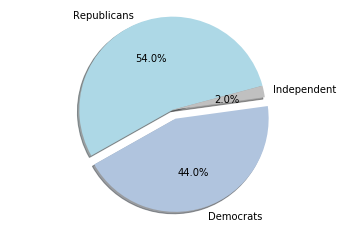

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
my_labels = "Republicans", "Democrats", "Independent"
my_colors = ["lightblue", "lightsteelblue", "silver"]
my_explode = (0, 0.1, 0)
plt.pie(votes["party"].value_counts(), labels=my_labels, autopct="%1.1f%%", startangle=15, shadow= True, colors=my_colors, explode=my_explode)
plt.axis('equal')
plt.show()

In [4]:
print(votes.mean())

00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


From knowledge from the exploration, I think that Senators will cluster along party lines, and the vast majority of Senators are either Republicans or Democrats, I'll pick 2 for our number of clusters.



## Creating and Exploring the Clusters

In [8]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])
print(senator_distances)

[[3.12141628 1.3134775 ]
 [2.6146248  2.05339992]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [1.43833966 2.96866004]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [0.31287498 3.30758755]
 [0.33960656 3.41651746]
 [3.27058526 0.96734144]
 [0.33960656 3.41651746]
 [3.34875646 0.53945585]
 [0.33960656 3.41651746]
 [1.18084816 3.12695614]
 [1.23852221 3.13536063]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [2.6146248  2.05339992]
 [0.58487332 3.31421108]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [3.56324683 0.93036231]
 [3.42004795 0.24198446]
 [1.73847904 2.82326711]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [0.33960656 3.41651746]
 [3.42004795 0.24198446]
 [3.42004795 0.24198446]
 [0.58487332 3.31421108]
 [3.27058526 0.92088553]
 [0.33960656 3.41651746]
 [3.19687093 0.64668818]
 [3.42004795 0.24198446]


In [9]:
labels = kmeans_model.labels_
print(pd.crosstab(labels, votes["party"]))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


Both of the clusters mostly broke down along party lines. 

- The first cluster contains 41 Democrats, and both Independents. 
- The second cluster contains 3 Democrats, and 54 Republicans.

No Republicans seem to have broken party ranks to vote with the Democrats, but 3 Democrats are more similar to Republicans in their voting than their own party. 

I'll explore these 3 Democrat Senators in more depth so I can figure out why that is


In [13]:
democratic_outliers = votes[(labels == 1) & (votes["party"] == "D")]
print(democratic_outliers)

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


- Senator Reid seem to be always absent when roll call votes are been called
- Senator Heitkamp and Senator Manchin seem to be totally biased towards the mainstream of the Democratic party


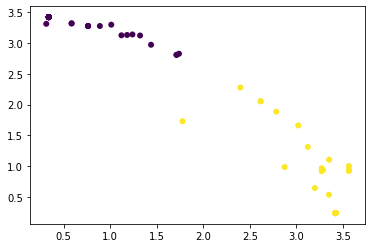

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], c=labels, linewidths=0)
plt.show()

- The dark purple color represents the Democrat's cluster
- The yellow color represents the Republican's cluster

## Discovering the Party Extremist and less Extremist Senators

The most extreme Senators are those who are the furthest away from one cluster. 

For example, a radical Republican would be as far from the Democratic cluster as possible. 

Senators who are in between both clusters are more moderate, as they fall in between the views of the two parties.

I'll cube the distances in both columns of senator_distances, then add them together, so that we can get a good amount of separation between the extremists who are farther away from a party

The higher the exponent we raise a set of numbers to, the more separation we'll see between small values and low values. 



In [15]:
extremism = (senator_distances ** 3).sum(axis=1)
votes["extremism"] = extremism
votes.sort_values("extremism", inplace=True, ascending=False)
print(votes.head(10))

         name party state  00001  00004  00005  00006  00007  00008  00009  \
98     Wicker     R    MS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
53   Lankford     R    OK    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
69       Paul     R    KY    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
80      Sasse     R    NE    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
26       Cruz     R    TX    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
48    Johnson     R    WI    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
47    Isakson     R    GA    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
65  Murkowski     R    AK    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
64      Moran     R    KS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
30       Enzi     R    WY    0.0    1.0    1.0    1.0    1.0    0.0    1.0   

    00010  00020  00026  00032  00038  00039  00044  00047  extremism  
98    0.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  46.250476

In [18]:
votes.extremism.describe()

count    100.000000
mean      37.778742
std        5.218687
min       10.784129
25%       36.257883
50%       39.918781
75%       40.017540
max       46.250476
Name: extremism, dtype: float64

In [74]:
extremist =  votes[votes["extremism"] >= 35]
extremist

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.250476
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
48,Johnson,R,WI,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
47,Isakson,R,GA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
65,Murkowski,R,AK,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
64,Moran,R,KS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
30,Enzi,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540


### Selecting the Democratic and Republican Extremist

In [75]:
Democratic_extremist = extremist[extremist["party"] == "D"]

In [76]:
Republican_extremist = extremist[extremist["party"] == "R"]

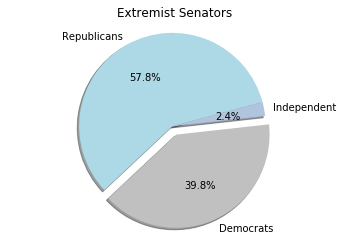

In [85]:
my_labels = "Republicans", "Democrats", "Independent"
my_colors = ["lightblue", "silver", "lightsteelblue"]
my_explode = (0, 0.1, 0)
plt.pie(extremist["party"].value_counts(), labels=my_labels, autopct="%1.1f%%", startangle=15, shadow= True, colors=my_colors, explode=my_explode)
plt.axis('equal')
plt.title("Extremist Senators")
plt.show()

- We can see that more percentage of Republicans are Extremist than Democrats and also all Independent Senators seem to be also extremist 

### For the less extremist senators

In [78]:
less_extremist = votes[votes["extremism"] < 35]
less_extremist

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
38,Graham,R,SC,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,32.942418
16,Casey,D,PA,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,32.721935
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,32.678748
95,Warner,D,VA,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,32.630021
15,Carper,D,DE,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,32.221500
51,Kirk,R,IL,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,32.106687
52,Klobuchar,D,MN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,31.816207
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,29.138297
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,28.234966
28,Donnelly,D,IN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,27.758024


### Selecting the Democratic and Republican Less Extremist

In [79]:
Democratic_less_extremist = less_extremist[less_extremist["party"] == "D"]
Republican_less_extremist = less_extremist[less_extremist["party"] == "R"]

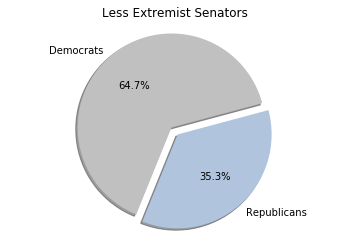

In [86]:
my_labels =  "Democrats", "Republicans"
my_colors = ["silver", "lightsteelblue"]
my_explode = (0, 0.1)
plt.pie(less_extremist["party"].value_counts(), labels=my_labels, autopct="%1.1f%%", startangle=15, shadow= True, colors=my_colors, explode=my_explode)
plt.axis('equal')
plt.title("Less Extremist Senators")
plt.show()

- We can see that more percentage of Democrats are less Extremist than Republicans 

Hence the Loyalty levels of Democratic Senators towards their party can be questionable